In [17]:
from datasets import load_dataset
import pandas as pd

In [2]:
ds = load_dataset("b-mc2/sql-create-context")

In [8]:
print(ds)

DatasetDict({
    train: Dataset({
        features: ['answer', 'question', 'context'],
        num_rows: 78577
    })
})


In [24]:
df = pd.DataFrame(ds['train'])

In [20]:
df

,answer,question,context
0,SELECT COUNT(*) FROM head WHERE age > 56,How many heads of the departments are older th...,CREATE TABLE head (age INTEGER)
1,"SELECT name, born_state, age FROM head ORDER B...","List the name, born state and age of the heads...","CREATE TABLE head (name VARCHAR, born_state VA..."
2,"SELECT creation, name, budget_in_billions FROM...","List the creation year, name and budget of eac...","CREATE TABLE department (creation VARCHAR, nam..."
3,"SELECT MAX(budget_in_billions), MIN(budget_in_...",What are the maximum and minimum budget of the...,CREATE TABLE department (budget_in_billions IN...
4,SELECT AVG(num_employees) FROM department WHER...,What is the average number of employees of the...,CREATE TABLE department (num_employees INTEGER...
...,...,...,...
78572,"SELECT time FROM table_name_35 WHERE score = ""...",What time was the match played with a score of...,"CREATE TABLE table_name_35 (time VARCHAR, scor..."
78573,SELECT ground FROM table_name_83 WHERE opponen...,On which ground did the team play Aston Villa?,"CREATE TABLE table_name_83 (ground VARCHAR, op..."
78574,SELECT competition FROM table_name_60 WHERE gr...,What kind of competition was it at San Siro at...,CREATE TABLE table_name_60 (competition VARCHA...
78575,SELECT COUNT(decile) FROM table_name_34 WHERE ...,What is the total number of decile for the red...,"CREATE TABLE table_name_34 (decile VARCHAR, na..."


In [29]:
print(f"Number of examples: {len(df)}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nData types:")
print(df.dtypes)

print(f"\nMissing values:")
print(df.isnull().sum())

print(df.head())

Number of examples: 78577
Columns: ['answer', 'question', 'context']

Data types:
answer      object
question    object
context     object
dtype: object

Missing values:
answer      0
question    0
context     0
dtype: int64
                                              answer  \
0           SELECT COUNT(*) FROM head WHERE age > 56   
1  SELECT name, born_state, age FROM head ORDER B...   
2  SELECT creation, name, budget_in_billions FROM...   
3  SELECT MAX(budget_in_billions), MIN(budget_in_...   
4  SELECT AVG(num_employees) FROM department WHER...   

                                            question  \
0  How many heads of the departments are older th...   
1  List the name, born state and age of the heads...   
2  List the creation year, name and budget of eac...   
3  What are the maximum and minimum budget of the...   
4  What is the average number of employees of the...   

                                             context  
0                    CREATE TABLE head (age IN

       question_length  question_word_count
count     78577.000000         78577.000000
mean         60.671062            11.538020
std          23.199291             4.401795
min          12.000000             3.000000
25%          43.000000             8.000000
50%          57.000000            11.000000
75%          73.000000            14.000000
max         244.000000            42.000000

Top 20 most common words in questions:
[('the', 85103), ('what', 45334), ('is', 42356), ('of', 40509), ('a', 22765), ('was', 17560), ('and', 17368), ('for', 15788), ('when', 14138), ('than', 14017), ('with', 12484), ('in', 12299), ('has', 11739), ('which', 10835), ('name', 8098), ('number', 7255), ('team', 7236), ('how', 7127), ('who', 7100), ('many', 6562)]


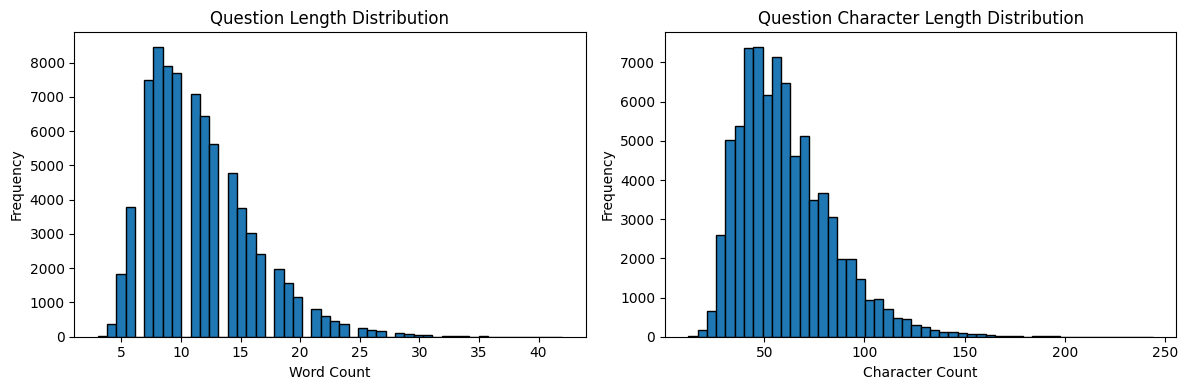

In [32]:
# Question length distribution
df['question_length'] = df['question'].str.len()
df['question_word_count'] = df['question'].str.split().str.len()

print(df[['question_length', 'question_word_count']].describe())

# Most common words in questions
from collections import Counter
import re

all_words = ' '.join(df['question'].tolist()).lower()
words = re.findall(r'\w+', all_words)
word_freq = Counter(words)

print("\nTop 20 most common words in questions:")
print(word_freq.most_common(20))

# Question length histogram
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(df['question_word_count'], bins=50, edgecolor='black')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Question Length Distribution')

plt.subplot(1, 2, 2)
plt.hist(df['question_length'], bins=50, edgecolor='black')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.title('Question Character Length Distribution')
plt.tight_layout()
plt.show()

In [35]:
import sqlparse

def analyze_sql_query(query):
    """Extract features from SQL query"""
    query_upper = query.upper()
    
    features = {
        'has_join': 'JOIN' in query_upper,
        'has_where': 'WHERE' in query_upper,
        'has_group_by': 'GROUP BY' in query_upper,
        'has_order_by': 'ORDER BY' in query_upper,
        'has_having': 'HAVING' in query_upper,
        'has_subquery': '(' in query and 'SELECT' in query_upper.split('FROM')[0],
        'has_aggregate': any(agg in query_upper for agg in ['COUNT', 'SUM', 'AVG', 'MAX', 'MIN']),
        'has_distinct': 'DISTINCT' in query_upper,
        'has_union': 'UNION' in query_upper,
        'num_tables': query_upper.count('FROM') + query_upper.count('JOIN')
    }
    return features

# Apply analysis
sql_features = df['answer'].apply(analyze_sql_query)
sql_df = pd.DataFrame(sql_features.tolist())

# Merge with original dataframe
df_with_features = pd.concat([df, sql_df], axis=1)

# Statistics
print("SQL Query Complexity Statistics:")
print(sql_df.describe())
print("\nPercentage of queries with each feature:")
print(sql_df.mean() * 100)

SQL Query Complexity Statistics:
         num_tables
count  78577.000000
mean       1.044746
std        0.281005
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       10.000000

Percentage of queries with each feature:
has_join           2.457462
has_where         96.306807
has_group_by       1.476259
has_order_by       1.351541
has_having         0.376701
has_subquery      32.126449
has_aggregate     33.967955
has_distinct       0.554870
has_union          0.153989
num_tables       104.474592
dtype: float64


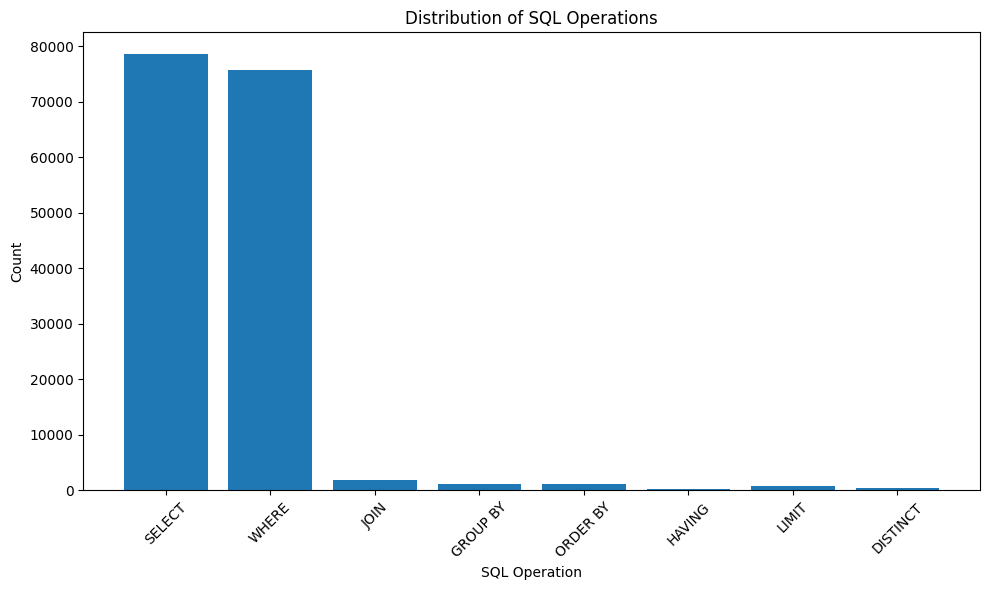

In [36]:
# Count SQL operations
operations = ['SELECT', 'WHERE', 'JOIN', 'GROUP BY', 'ORDER BY', 'HAVING', 'LIMIT', 'DISTINCT']
operation_counts = {}

for op in operations:
    operation_counts[op] = df['answer'].str.upper().str.contains(op).sum()

# Visualize
plt.figure(figsize=(10, 6))
plt.bar(operation_counts.keys(), operation_counts.values())
plt.xlabel('SQL Operation')
plt.ylabel('Count')
plt.title('Distribution of SQL Operations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

CREATE TABLE Statistics:
         num_tables   num_columns  context_length
count  78577.000000  78577.000000    78577.000000
mean       1.033381      1.033381       71.593494
std        0.224193      0.224193       19.612570
min        1.000000      1.000000       27.000000
25%        1.000000      1.000000       60.000000
50%        1.000000      1.000000       68.000000
75%        1.000000      1.000000       77.000000
max        5.000000      5.000000      489.000000


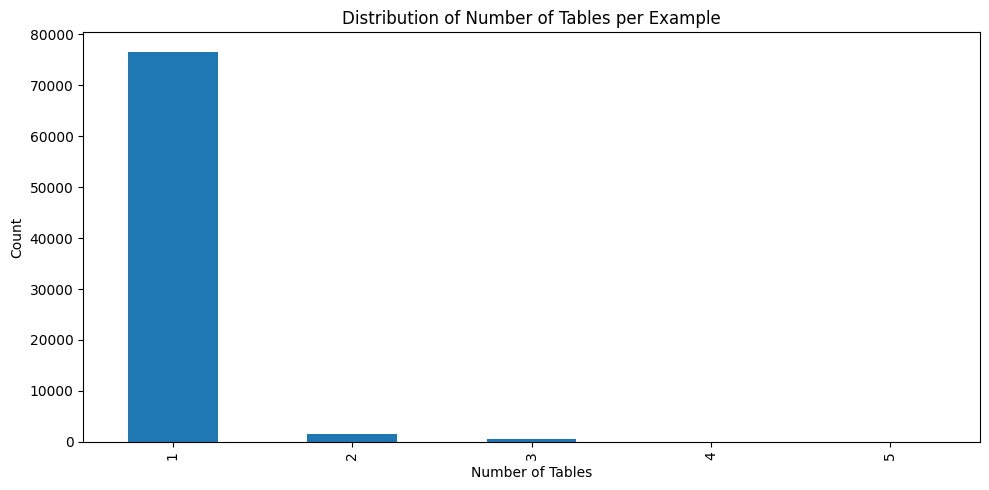

In [37]:
def analyze_create_statement(context):
    """Extract information from CREATE TABLE statement"""
    features = {
        'num_tables': context.upper().count('CREATE TABLE'),
        'num_columns': context.count('(') - context.count('(('),  # Approximate
        'has_primary_key': 'PRIMARY KEY' in context.upper(),
        'has_foreign_key': 'FOREIGN KEY' in context.upper(),
        'context_length': len(context)
    }
    return features

# Apply analysis
context_features = df['context'].apply(analyze_create_statement)
context_df = pd.DataFrame(context_features.tolist())

print("CREATE TABLE Statistics:")
print(context_df.describe())

# Visualize number of tables per example
plt.figure(figsize=(10, 5))
context_df['num_tables'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Number of Tables')
plt.ylabel('Count')
plt.title('Distribution of Number of Tables per Example')
plt.tight_layout()
plt.show()

In [38]:
import re

def extract_data_types(context):
    """Extract data types from CREATE TABLE statements"""
    data_types = re.findall(r'\b(VARCHAR|INTEGER|INT|TEXT|REAL|NUMERIC|BLOB|DATE|TIMESTAMP|BOOLEAN|FLOAT|DOUBLE)\b', 
                            context.upper())
    return data_types

# Extract all data types
all_data_types = []
for context in df['context']:
    all_data_types.extend(extract_data_types(context))

# Count frequency
from collections import Counter
data_type_freq = Counter(all_data_types)

print("Data Type Distribution:")
for dtype, count in data_type_freq.most_common():
    print(f"{dtype}: {count}")

Data Type Distribution:
VARCHAR: 169247
INTEGER: 16666
DATE: 6907
TEXT: 7
INT: 4
DOUBLE: 3
REAL: 1


Correlation between question length and query features:
                question_words  has_join  has_group_by  has_subquery  \
question_words        1.000000  0.098806      0.047464      0.266694   
has_join              0.098806  1.000000      0.371794      0.048696   
has_group_by          0.047464  0.371794      1.000000      0.177244   
has_subquery          0.266694  0.048696      0.177244      1.000000   
num_tables            0.111544  0.811034      0.249385      0.037285   

                num_tables  
question_words    0.111544  
has_join          0.811034  
has_group_by      0.249385  
has_subquery      0.037285  
num_tables        1.000000  


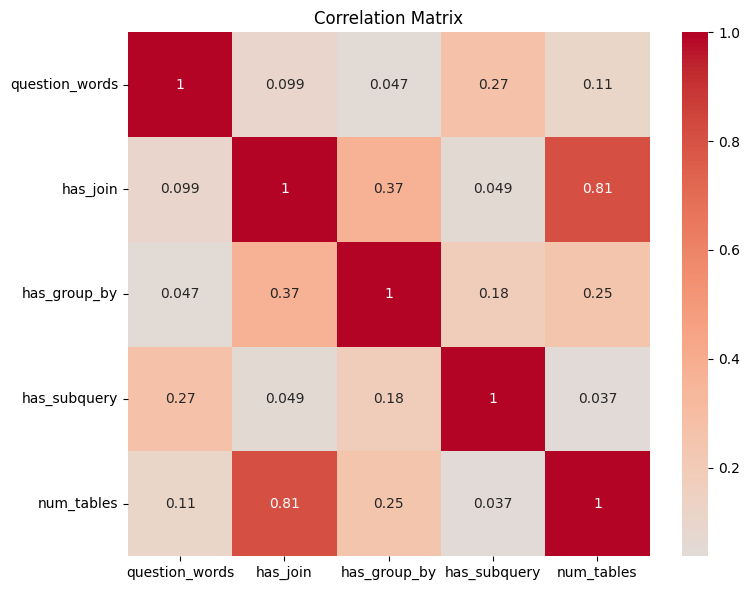

In [41]:
# Correlation between question length and query complexity
correlation_data = pd.DataFrame({
    'question_words': df['question_word_count'],
    'has_join': sql_df['has_join'].astype(int),
    'has_group_by': sql_df['has_group_by'].astype(int),
    'has_subquery': sql_df['has_subquery'].astype(int),
    'num_tables': sql_df['num_tables']
})

print("Correlation between question length and query features:")
print(correlation_data.corr())

# Visualize
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [42]:
def extract_table_names(context):
    """Extract table names from CREATE TABLE statements"""
    pattern = r'CREATE TABLE\s+(\w+)'
    tables = re.findall(pattern, context, re.IGNORECASE)
    return tables

df['table_names'] = df['context'].apply(extract_table_names)

# Flatten and count
all_table_names = [table for tables in df['table_names'] for table in tables]
table_freq = Counter(all_table_names)

print("Top 20 most common table names:")
for table, count in table_freq.most_common(20):
    print(f"{table}: {count}")

Top 20 most common table names:
table_name_31: 613
table_name_7: 598
table_name_96: 596
table_name_67: 591
table_name_16: 583
table_name_21: 583
table_name_95: 576
table_name_25: 570
table_name_8: 570
table_name_54: 570
table_name_98: 569
table_name_59: 567
table_name_43: 567
table_name_65: 565
table_name_33: 561
table_name_40: 561
table_name_86: 560
table_name_61: 560
table_name_51: 560
table_name_35: 559



Domain Distribution:
domain
other            55647
sports           12972
geography         5511
education         1982
business          1474
entertainment      991
Name: count, dtype: int64


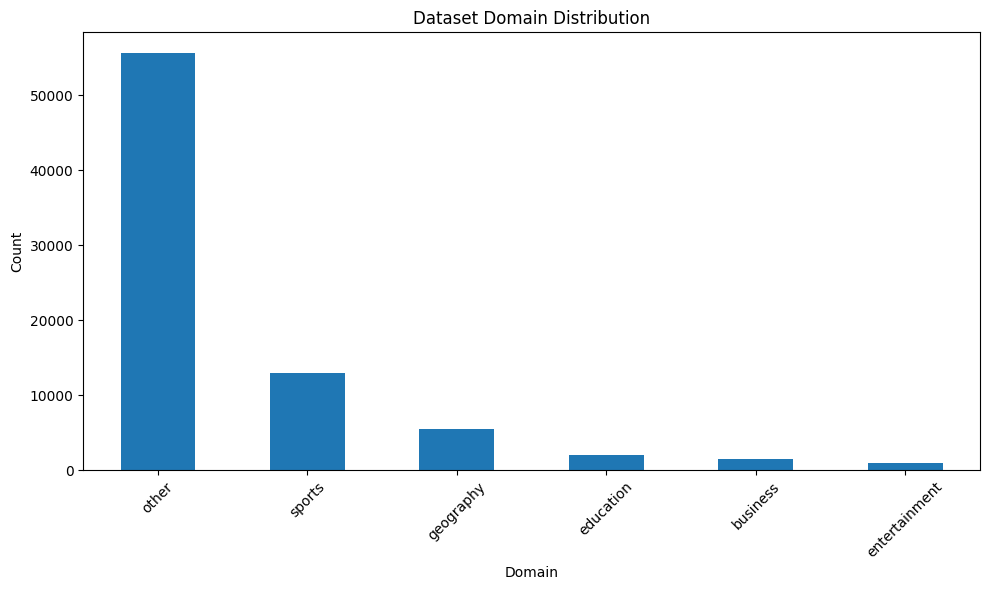

In [43]:
# Common domain keywords
domains = {
    'sports': ['player', 'team', 'game', 'match', 'stadium'],
    'education': ['student', 'course', 'teacher', 'school', 'class'],
    'business': ['customer', 'order', 'product', 'employee', 'department'],
    'geography': ['city', 'country', 'state', 'location', 'region'],
    'entertainment': ['movie', 'actor', 'song', 'album', 'artist']
}

def classify_domain(text):
    """Classify domain based on keywords"""
    text_lower = text.lower()
    for domain, keywords in domains.items():
        if any(keyword in text_lower for keyword in keywords):
            return domain
    return 'other'

df['domain'] = df['context'].apply(classify_domain)

print("\nDomain Distribution:")
print(df['domain'].value_counts())

# Visualize
plt.figure(figsize=(10, 6))
df['domain'].value_counts().plot(kind='bar')
plt.xlabel('Domain')
plt.ylabel('Count')
plt.title('Dataset Domain Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
# Check duplicate questions
duplicate_questions = df[df.duplicated(subset=['question'], keep=False)]
print(f"Duplicate questions: {len(duplicate_questions)}")

# Check duplicate question-answer pairs
duplicate_pairs = df[df.duplicated(subset=['question', 'answer'], keep=False)]
print(f"Duplicate question-answer pairs: {len(duplicate_pairs)}")

# Show examples
if len(duplicate_questions) > 0:
    print("\nExample duplicates:")
    print(duplicate_questions[['question', 'answer']].head())

Duplicate questions: 521
Duplicate question-answer pairs: 0

Example duplicates:
                           question                              answer
157       How many users are there?  SELECT COUNT(*) FROM user_profiles
212  How many employees do we have?       SELECT COUNT(*) FROM Employee
222    How many flights do we have?         SELECT COUNT(*) FROM Flight
261    How many students are there?        SELECT COUNT(*) FROM Student
385  How many customers do we have?      SELECT COUNT(*) FROM Customers


In [48]:
def extract_query_template(query):
    """Convert SQL query to template by replacing literals"""
    # Replace string literals
    template = re.sub(r"'[^']*'", "'VALUE'", query)
    # Replace numbers
    template = re.sub(r'\b\d+\b', 'NUM', template)
    return template.strip()

df['query_template'] = df['answer'].apply(extract_query_template)
template_freq = df['query_template'].value_counts()

print("Top 10 most common query templates:")
print(template_freq.head(10))

Top 10 most common query templates:
query_template
SELECT opponent FROM table_name_49 WHERE attendance = "NUM,NUM"        5
SELECT date FROM table_name_14 WHERE record = "NUM-NUM"                4
SELECT date FROM table_name_86 WHERE record = "NUM-NUM"                4
SELECT NUM FROM table_name_32 WHERE NUM = "1r"                         4
SELECT date FROM table_name_38 WHERE score = "NUM-NUM"                 4
SELECT place FROM table_name_86 WHERE score = NUM - NUM - NUM = NUM    4
SELECT NUM FROM table_27146868_1 WHERE NUM = "NUM.NUM"                 4
SELECT score FROM table_name_77 WHERE record = "NUM-NUM"               4
SELECT opponent FROM table_name_86 WHERE attendance = "NUM,NUM"        4
SELECT record FROM table_name_64 WHERE date = "may NUM"                3
Name: count, dtype: int64
